In [ ]:
import pandas as pd

# Load the dataset
imdb_data = pd.read_csv('/content/IMDb_Data_final.csv')

# Ensure 'Duration' column contains only numeric values
# Remove non-numeric characters, keeping only numeric values
imdb_data['Duration'] = imdb_data['Duration'].str.extract('(\d+)')  # Extract numbers
imdb_data['Duration'] = pd.to_numeric(imdb_data['Duration'], errors='coerce')  # Convert to numeric, set invalid parsing as NaN

# Fill any NaN values in Duration with a default value (e.g., 0)
imdb_data['Duration'].fillna(0, inplace=True)

# Verify the cleaned data
print(imdb_data[['Title', 'Duration']].head())





                               Title  Duration
0                  Top Gun: Maverick     130.0
1  Everything Everywhere All at Once     139.0
2                         The Batman     176.0
3                      Jurassic Park     127.0
4                      The Godfather     175.0


<ipython-input-3-57378e3ff7ed>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_data['Duration'].fillna(0, inplace=True)


In [ ]:
# Check data summary after cleaning
imdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             1000 non-null   float64
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [ ]:
imdb_data.head()


,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130.0,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139.0,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176.0,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127.0,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175.0,A,1972


In [ ]:
# Combine relevant fields for embedding input
imdb_data['Combined_Text'] = (
    imdb_data['Title'] + " " +
    imdb_data['Director'] + " " +
    imdb_data['Stars'] + " " +
    imdb_data['Category']
)

In [ ]:
imdb_data.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,Combined_Text
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130.0,UA,2022,"Top Gun: Maverick JosephKosinski TomCruise, Je..."
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139.0,R,2022,"Everything Everywhere All at Once DanKwan, , M..."
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176.0,UA,2022,"The Batman MattReeves RobertPattinson, ZoëKrav..."
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127.0,UA,1993,"Jurassic Park StevenSpielberg SamNeill, LauraD..."
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175.0,A,1972,"The Godfather FrancisFordCoppola MarlonBrando,..."


In [ ]:
!pip install sentence-transformers






In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each row in the 'Combined_Text' column
imdb_data['Embedding'] = imdb_data['Combined_Text'].apply(lambda x: model.encode(x) if isinstance(x, str) else None)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Generate embeddings for each row in Combined_Text column
import numpy as np
imdb_data['Embedding'] = imdb_data['Combined_Text'].apply(lambda x: model.encode(x) if isinstance(x, str) else None)

# Check the data type of Embedding column
print(imdb_data['Embedding'].apply(type).value_counts())

# Access an embedding safely
sample_embedding = imdb_data['Embedding'].iloc[0]  # Get the first embedding
if isinstance(sample_embedding, (list, np.ndarray)):
    print(sample_embedding[:5])  # Print first 5 elements if it's a list/array
else:
    print("Embedding is not a list or array.")


Embedding
<class 'numpy.ndarray'>    999
<class 'NoneType'>           1
Name: count, dtype: int64
[-0.07821979 -0.04340514 -0.02086119 -0.02159145  0.03370604]


In [ ]:
!pip install faiss-cpu




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 50.6 MB/s eta 0:00:00


In [ ]:
import numpy as np

# Set expected embedding size (e.g., 384 for Sentence-BERT models like all-MiniLM-L6-v2)
expected_size = 384

# Check the size of each embedding and filter out incorrect sizes
imdb_data['Embedding'] = imdb_data['Embedding'].apply(lambda x: x if isinstance(x, np.ndarray) and x.shape[0] == expected_size else np.nan)

# Drop rows with NaN embeddings
imdb_data = imdb_data.dropna(subset=['Embedding'])

# Convert embeddings to a numpy array for indexing
embeddings = np.vstack(imdb_data['Embedding'].values)
print("Shape of embeddings array:", embeddings.shape)



Shape of embeddings array: (999, 384)


Annoy (Approximate Nearest Neighbors Oh Yeah)
Developed by: Spotify for fast music recommendation systems.
Algorithm Type: Uses random projection trees (a variant of k-d trees) for dividing the dataset into multiple binary trees. Each query searches across these trees to find the nearest neighbors.


In [ ]:

!pip install annoy # Install the annoy library
from annoy import AnnoyIndex


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=6b5ef6da7c9e1c444570b61ad571f8c7474ce5b341b407adc6b68995be5bc70c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from annoy import AnnoyIndex
import faiss


In [ ]:
# Sample queries
queries = ["action movie", "romantic drama", "sci-fi thriller", "family-friendly animation"]

# Load your dataset embeddings and initialize the model for encoding
dimension = 384  # Set this to match your embedding dimension
model = SentenceTransformer('all-MiniLM-L6-v2')
query_vectors = [model.encode(query).astype('float32') for query in queries]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:


# Measure latency for simple text search (using string matching)
latencies_text_search = []
for query in queries:
    start_time = time.time()
    imdb_data[imdb_data['Combined_Text'].str.contains(query, case=False)]
    latencies_text_search.append(time.time() - start_time)

avg_latency_text_search = np.mean(latencies_text_search)
print(f"Average latency for simple text search: {avg_latency_text_search * 1000:.2f} ms")




Average latency for simple text search: 5.03 ms


In [ ]:
# Initialize Annoy
annoy_index = AnnoyIndex(dimension, 'angular')
for i, vec in enumerate(embeddings):
    annoy_index.add_item(i, vec)
annoy_index.build(10)  # Set the number of trees

# Measure latency for Annoy
latencies_annoy = []
k = 10

for qv in query_vectors:
    start_time = time.time()
    indices = annoy_index.get_nns_by_vector(qv, k)
    latencies_annoy.append(time.time() - start_time)

# Assuming you want to get recommendations for the first query:
query_vector = query_vectors[0]  # Assign query_vector
annoy_indices = annoy_index.get_nns_by_vector(query_vector, k)
print("Annoy Recommendations:")
print(imdb_data.iloc[annoy_indices][['Title', 'Category', 'IMDb-Rating']])

avg_latency_annoy = np.mean(latencies_annoy)
print(f"Average latency for Annoy: {avg_latency_annoy * 1000:.2f} ms")

Annoy Recommendations:
                                            Title                  Category  \
270                                      Kick-Ass       Action,Comedy,Crime   
50                                           Léon        Action,Crime,Drama   
243                                         Taken     Action,Crime,Thriller   
293                                 Lethal Weapon     Action,Crime,Thriller   
30                                      Inception   Action,Adventure,Sci-Fi   
396                             Kill Bill: Vol. 2     Action,Crime,Thriller   
40                                           Heat        Action,Crime,Drama   
18   Star Wars: Episode III - Revenge of the Sith  Action,Adventure,Fantasy   
76                   Kingsman: The Secret Service   Action,Adventure,Comedy   
66     Star Wars: Episode VII - The Force Awakens   Action,Adventure,Sci-Fi   

     IMDb-Rating  
270          7.6  
50           8.5  
243          7.8  
293          7.6  
30          

HNSW (Hierarchical Navigable Small World)
Developed by: Research community, widely adopted by FAISS and other ANN libraries.
Algorithm Type: Constructs a graph-based approach, where each node (data point) is connected to its nearest neighbors, creating a small-world graph structure. Queries navigate this graph hierarchically to reach neighbors efficiently.

In [ ]:
# Initialize HNSW with FAISS
hnsw_index = faiss.IndexHNSWFlat(dimension, 32)  # M=32 for HNSW
hnsw_index.add(embeddings)

# Measure latency for HNSW
latencies_hnsw = []

for qv in query_vectors:
    start_time = time.time()
    _, _ = hnsw_index.search(np.array([qv]), k)
    latencies_hnsw.append(time.time() - start_time)

_, hnsw_indices = hnsw_index.search(np.array([query_vector]), k)
print("\nHNSW (FAISS) Recommendations:")
print(imdb_data.iloc[hnsw_indices[0]][['Title', 'Category', 'IMDb-Rating']])

avg_latency_hnsw = np.mean(latencies_hnsw)
print(f"Average latency for HNSW: {avg_latency_hnsw * 1000:.2f} ms")



HNSW (FAISS) Recommendations:
                                            Title                   Category  \
270                                      Kick-Ass        Action,Comedy,Crime   
50                                           Léon         Action,Crime,Drama   
243                                         Taken      Action,Crime,Thriller   
293                                 Lethal Weapon      Action,Crime,Thriller   
30                                      Inception    Action,Adventure,Sci-Fi   
396                             Kill Bill: Vol. 2      Action,Crime,Thriller   
40                                           Heat         Action,Crime,Drama   
166                                       Skyfall  Action,Adventure,Thriller   
18   Star Wars: Episode III - Revenge of the Sith   Action,Adventure,Fantasy   
76                   Kingsman: The Secret Service    Action,Adventure,Comedy   

     IMDb-Rating  
270          7.6  
50           8.5  
243          7.8  
293         

In [ ]:
# Create TF-IDF matrix for text-based search
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(imdb_data['Combined_Text'])

latencies_text_vector = []

for query, qv in zip(queries, query_vectors):
    # Text Search Step
    query_tfidf = tfidf_vectorizer.transform([query])
    text_similarity_scores = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

    # Get top-k text-based results
    top_text_indices = text_similarity_scores.argsort()[-k:][::-1]
    refined_embeddings = [embeddings[i] for i in top_text_indices]

    # Use Annoy on text-filtered results for vector refinement
    refined_index = AnnoyIndex(dimension, 'angular')
    for i, vec in enumerate(refined_embeddings):
        refined_index.add_item(i, vec)
    refined_index.build(10)

    # Measure combined Text + Vector search latency
    start_time = time.time()
    refined_indices = refined_index.get_nns_by_vector(qv, k)
    latencies_text_vector.append(time.time() - start_time)

# Perform vector search on filtered results
refined_indices = refined_index.get_nns_by_vector(query_vector, k)
print("\nText + Vector Search Recommendations:")
print(imdb_data.iloc[refined_indices][['Title', 'Category', 'IMDb-Rating']])

avg_latency_text_vector = np.mean(latencies_text_vector)
print(f"Average latency for Text + Vector: {avg_latency_text_vector * 1000:.2f} ms")


Text + Vector Search Recommendations:
                                               Title  \
6                             RRR (Rise Roar Revolt)   
0                                  Top Gun: Maverick   
2                                         The Batman   
1                  Everything Everywhere All at Once   
3                                      Jurassic Park   
7  Pirates of the Caribbean: The Curse of the Bla...   
4                                      The Godfather   
8                                     Dune: Part One   
5                            Spider-Man: No Way Home   
9                                         Goodfellas   

                   Category  IMDb-Rating  
6              Action,Drama          8.1  
0              Action,Drama          8.6  
2        Action,Crime,Drama          7.9  
1   Action,Adventure,Comedy          8.3  
3   Action,Adventure,Sci-Fi          8.2  
7  Action,Adventure,Fantasy          8.1  
4               Crime,Drama          9.2  


IVF (Inverted File Index)
Developed by: Popular in the FAISS library by Facebook AI Research.
Algorithm Type: Uses clustering (inverted file indexing) to group vectors into clusters, allowing the search to focus on relevant clusters instead of the entire dataset. **bold text**


In [ ]:
# Set up FAISS IVF index
nlist = 100  # Number of clusters
quantizer = faiss.IndexFlatL2(dimension)  # Flat index for quantization
ivf_index = faiss.IndexIVFFlat(quantizer, dimension, nlist)
ivf_index.train(embeddings)
ivf_index.add(embeddings)

# Measure latency for IVF
latencies_ivf = []

for qv in query_vectors:
    start_time = time.time()
    _, _ = ivf_index.search(np.array([qv]), k)
    latencies_ivf.append(time.time() - start_time)

# Get IVF recommendations
_, ivf_indices = ivf_index.search(np.array([query_vector]), k)
print("\nIVF (FAISS) Recommendations:")
print(imdb_data.iloc[ivf_indices[0]][['Title', 'Category', 'IMDb-Rating']])


avg_latency_ivf = np.mean(latencies_ivf)
print(f"Average latency for IVF: {avg_latency_ivf * 1000:.2f} ms")



IVF (FAISS) Recommendations:
                                          Title                 Category  \
30                                    Inception  Action,Adventure,Sci-Fi   
66   Star Wars: Episode VII - The Force Awakens  Action,Adventure,Sci-Fi   
266                              V for Vendetta      Action,Drama,Sci-Fi   
77                                   The Matrix            Action,Sci-Fi   
142                                The Avengers  Action,Adventure,Sci-Fi   
121                     Raiders of the Lost Ark         Action,Adventure   
435                                     Gravity      Action,Drama,Sci-Fi   
304         Captain America: The Winter Soldier  Action,Adventure,Sci-Fi   
448                                   Mad Max 2  Action,Adventure,Sci-Fi   
136                                    Iron Man  Action,Adventure,Sci-Fi   

     IMDb-Rating  
30           8.8  
66           7.8  
266          8.2  
77           8.7  
142          8.0  
121          8.4  


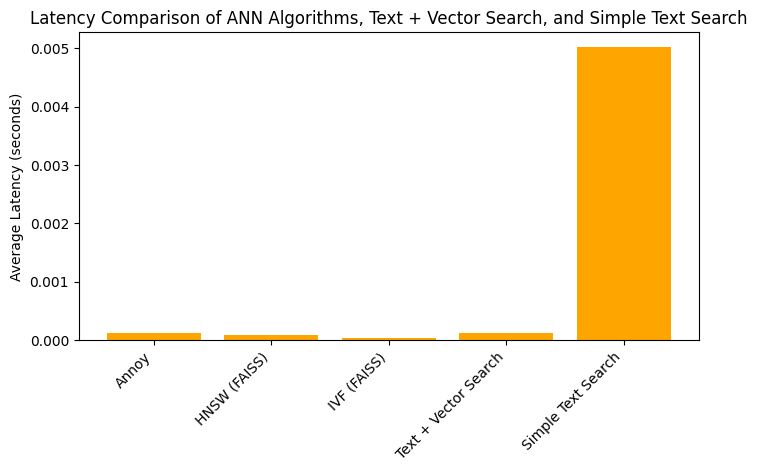

In [ ]:
# Aggregate average latencies (include simple text search)
latencies = [
    avg_latency_annoy, avg_latency_hnsw,
    avg_latency_ivf, avg_latency_text_vector,
    avg_latency_text_search
]

labels = [
    'Annoy', 'HNSW (FAISS)', 'IVF (FAISS)',
    'Text + Vector Search', 'Simple Text Search'
]

# Plot latency comparison (include simple text search)
plt.figure(figsize=(8, 4))
plt.bar(labels, latencies, color='orange')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Latency (seconds)")
plt.title("Latency Comparison of ANN Algorithms, Text + Vector Search, and Simple Text Search")
plt.show()

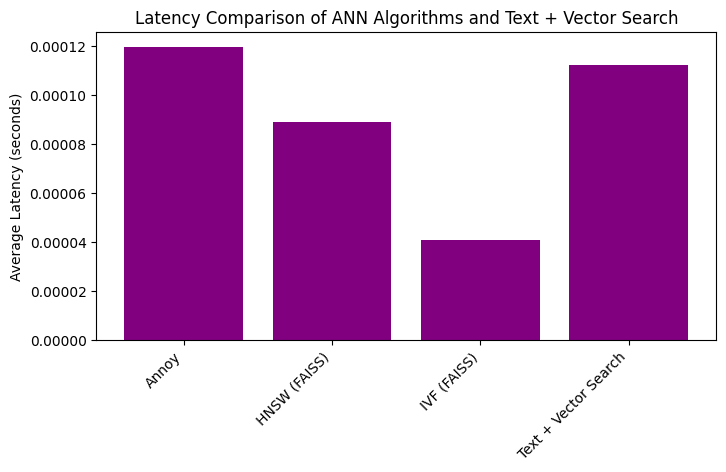

In [ ]:
# Aggregate average latencies
latencies = [
    avg_latency_annoy, avg_latency_hnsw,
    avg_latency_ivf,avg_latency_text_vector
]

labels = [
    'Annoy', 'HNSW (FAISS)','IVF (FAISS)',
    'Text + Vector Search'
]

# Plot latency comparison
plt.figure(figsize=(8, 4))
plt.bar(labels, latencies, color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Latency (seconds)")
plt.title("Latency Comparison of ANN Algorithms and Text + Vector Search")
plt.show()
